In [1]:
#total_ring_mass.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 241)
total_ring_mass =  1e-09
shear_viscosity =  2e-12
bulk_viscosity =  3e-12
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.023, 'e_prime': 0.0}
e.min() =  0.02234612019916051
e.max() =  0.023530469001546622


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  10416.6666667


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np
import pandas as pd

In [5]:
#inner, outer, and average streamline's orbit elements
a_inner = a[:, 0, :].mean(axis=1)
a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
a_avg = (a_inner + a_outer)/2
e_inner = e[:, 0, :].mean(axis=1)
e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
e_avg = (e_inner + e_outer)/2
q_inner = a_inner*(1.0 - e_inner)
q_outer = a_outer*(1.0 - e_outer)
Q_inner = a_inner*(1.0 + e_inner)
Q_outer = a_outer*(1.0 + e_outer)
dr_peri = q_outer - q_inner
dr_apo = Q_outer - Q_inner

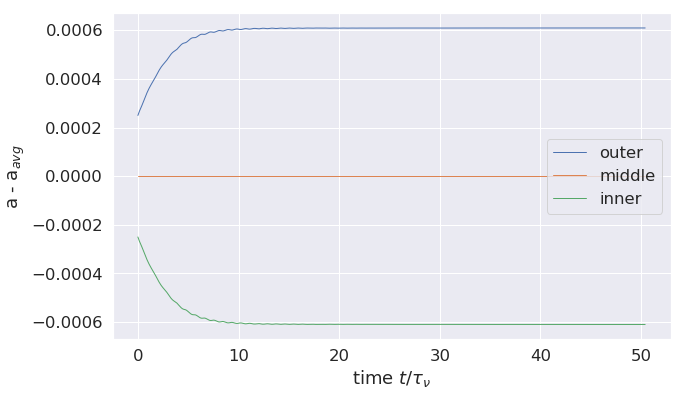

In [6]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = a_outer - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='outer')
y = a_avg - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='middle')
y = a_inner - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('a - a$_{avg}$')
p = plt.legend(loc='center right')

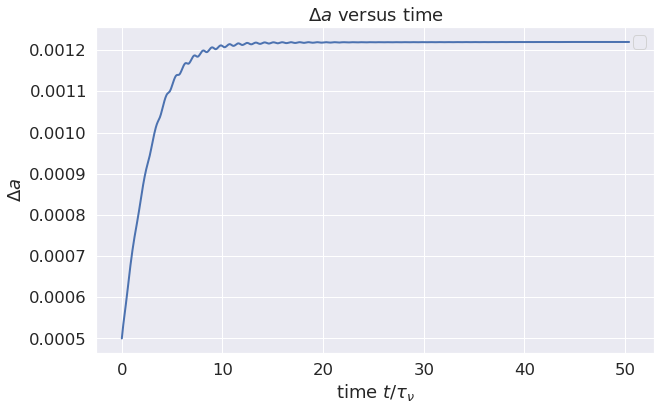

In [7]:
#plot delta_a versus time
delta_a = a_outer - a_inner
x = times_viscous
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

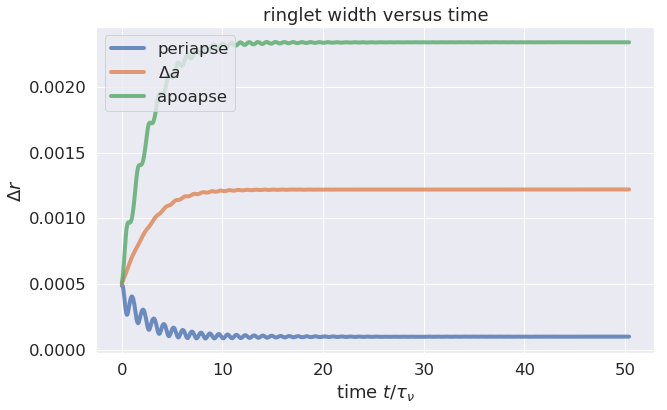

In [8]:
#plot streamline's dr_peri and dr_apo vs time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = dr_peri
p = ax.plot(x, y, linestyle='-', linewidth=4, alpha=0.8, label='periapse')
import numpy.polynomial.polynomial as poly
#y = poly.polyval(x, poly.polyfit(x, y, 17))
#p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='periapse')
y = delta_a
p = ax.plot(x, y, linestyle='-', linewidth=4, alpha=0.8, label=r'$\Delta a$')
#y = poly.polyval(x, poly.polyfit(x, y, 17))
#p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label=r'$\Delta a$')
y = dr_apo
p = ax.plot(x, y, linestyle='-', linewidth=4, alpha=0.8, label='apoapse')
#y = poly.polyval(x, poly.polyfit(x, y, 17))
#p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='apoapse')
p = ax.set_title('ringlet width versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta r$')
p = plt.legend()

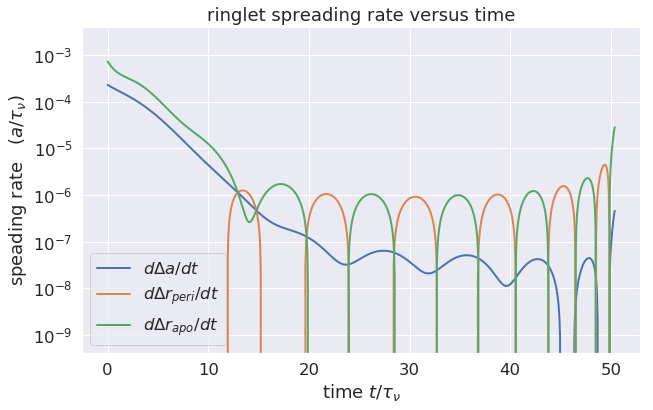

In [9]:
#plot ringlet radial spreading rate in units of a/tau_viscous
viscous_speed = a_avg[0]/viscous_timescale
x = times_viscous
f, ax = plt.subplots(figsize=(10, 6))
y = delta_a
y = poly.polyval(x, poly.polyfit(x, y, 17))
y = np.gradient(y, times)
y = y/viscous_speed
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$d\Delta a/dt$')
y = dr_peri
y = poly.polyval(x, poly.polyfit(x, y, 17))
y = np.gradient(y, times)
y = y/viscous_speed
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$d\Delta r_{peri}/dt$')
y = dr_apo
y = poly.polyval(x, poly.polyfit(x, y, 17))
y = np.gradient(y, times)
y = y/viscous_speed
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$d\Delta r_{apo}/dt$')
p = ax.set_title(r'ringlet spreading rate versus time')
p = ax.set_ylabel(r'speading rate   $(a/\tau_\nu)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_yscale('log')
p = ax.set_ylim(4.0e-10, 4.0e-3)
p = ax.legend()

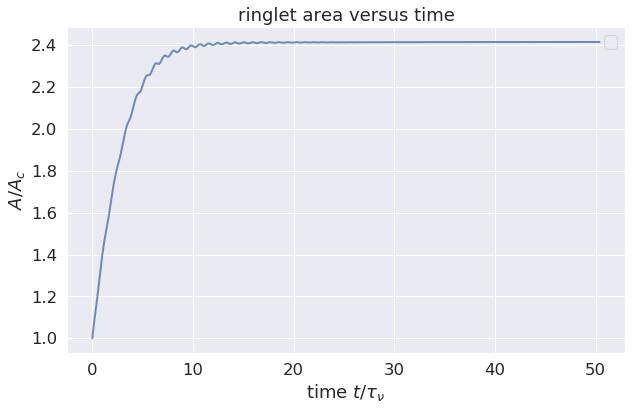

In [10]:
#plot ringlet area over time
area_outer = np.pi*(a_outer**2)*np.sqrt(1.0 - e_outer**2)
area_inner = np.pi*(a_inner**2)*np.sqrt(1.0 - e_inner**2)
area = area_outer - area_inner
area_circular = np.pi*(a_outer**2 - a_inner**2)
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = area/area_circular[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8)
p = ax.set_title('ringlet area versus time')
p = ax.set_ylabel(r'$A/A_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

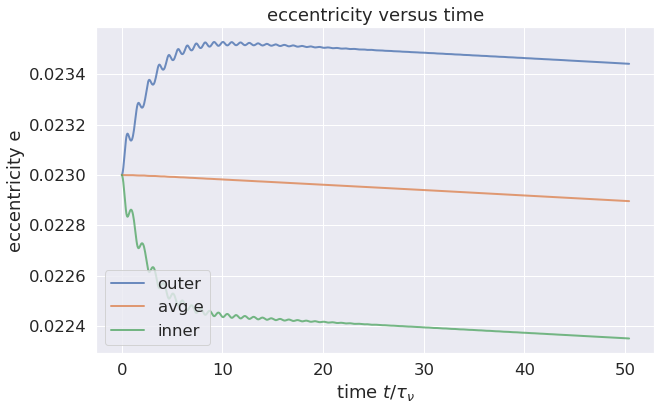

In [11]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='avg e')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_title('eccentricity versus time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

In [12]:
#compute delta_e=e_outer-e_inner and e_prime = a_mid*delta_e/delta_a versus time
delta_e = e_outer - e_inner
e_prime = a_avg*delta_e/delta_a

In [13]:
#compute delta_w=wt_outer-wt_inner and wt_prime = a_mid*e_mid*delta_wt/delta_a 
#and q=sqrt(e_prime^2 + wt_prime^2) versus time
delta_wt_list = []
for t_idx in range(len(times)):
    s_idx = 0
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_inner = wt[t_idx, s_idx, theta_idx]
    s_idx = 1
    r0 = r[t_idx, s_idx]
    theta_idx = np.argmin(r0)
    wt_outer = wt[t_idx, s_idx, theta_idx]
    delta_wt_list += [wt_outer - wt_inner]
delta_wt = adjust_angle(np.array(delta_wt_list))
wt_prime = a_avg*e_avg*delta_wt/delta_a
q = np.sqrt(e_prime**2 + wt_prime**2)

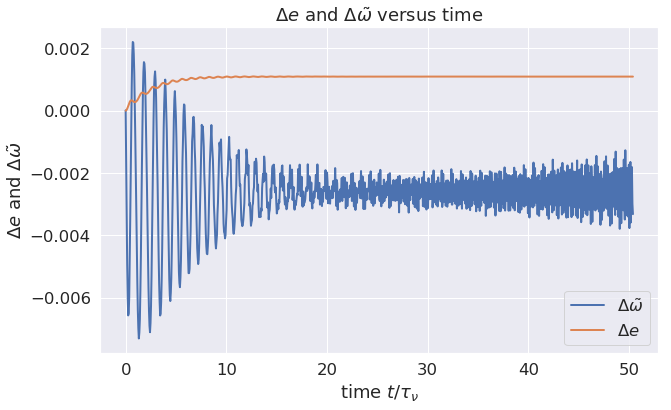

In [14]:
#plot delta_e and delta_wt versus time
x = times_viscous
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}$')
y = delta_e
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
p = ax.set_title(r'$\Delta e$ and $\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$ and $\Delta\tilde{\omega}$')
p = plt.legend()

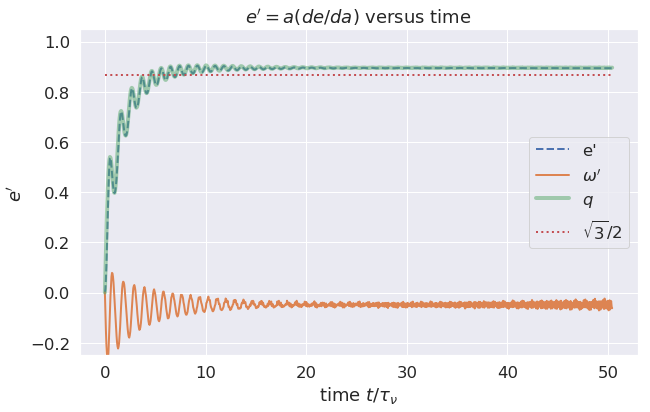

In [15]:
#plot e_prime wt_prime and q versus time
x = times_viscous
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.25, 1.05)
p = ax.legend()

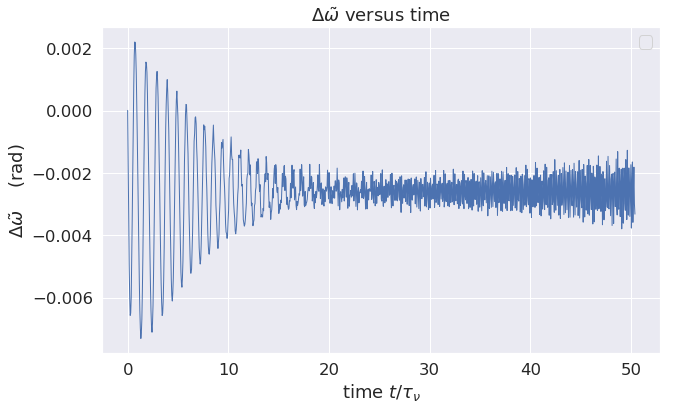

In [16]:
#plot delta_wt versus time
x = times_viscous
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

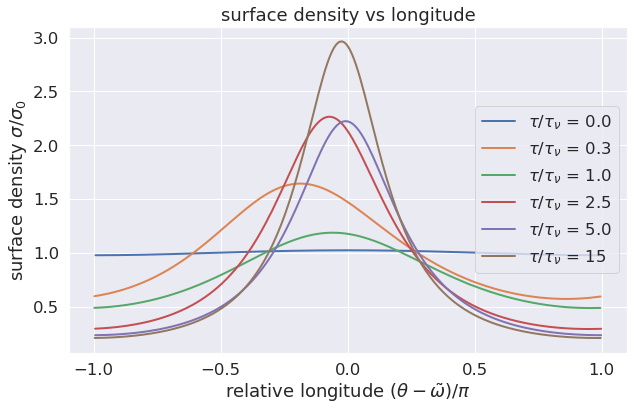

In [17]:
#plot surface density vs longitude
f, ax = plt.subplots(figsize=(10, 6))
plot_times = np.array([0.0, 0.7, 2.0, 5.0, 10.0, 30.0])*0.5
middle_index = number_of_streamlines/2
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    r_now = r[t_idx]
    t_now = t[t_idx]
    wt_now = wt[t_idx]
    delta_r = delta_f(r_now, t_now)
    sd_now = surface_density(lambda0, delta_r)
    r_middle = r_now[middle_index]
    t_middle = t_now[middle_index]
    wt_middle = wt_now[middle_index]
    sd_middle = sd_now[middle_index]
    pidx = r_middle.argmin()
    wt_min = wt_middle[pidx]
    t_rotating = adjust_angle(t_middle - wt_min)
    if (t_idx == 0):
        sd_initial = sd_now.mean()
    y = sd_middle/sd_initial
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    if (lbl[-1] == '.'):
        lbl = lbl[:-1]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'surface density vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='center right')

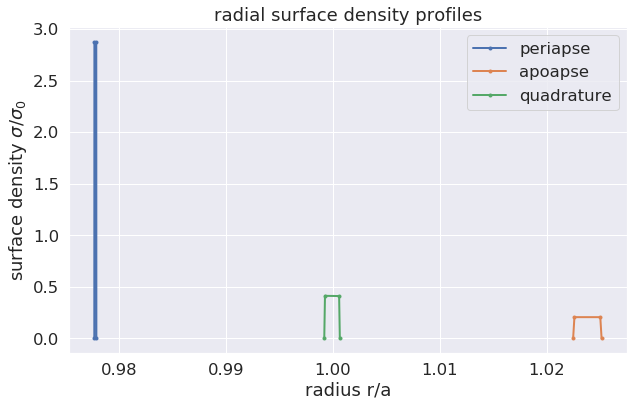

In [18]:
#plot radial cuts of surface density
t_idx = total_number_of_outputs/2
r_now = r[t_idx]
t_now = t[t_idx]
wt_now = wt[t_idx]
delta_r = delta_f(r_now, t_now)
sd_now = surface_density(lambda0, delta_r)
r_middle = r_now[middle_index]
#sd(r) along periapse
idx = r_middle.argmin()
idx_peri = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded)
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
f, ax = plt.subplots(figsize=(10, 6))
xp = r_padded/a_avg[t_idx]
yp = sd_padded/sd_initial
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='periapse')
#sd(r) along apoapse
idx = r_middle.argmax()
idx_apo = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded)
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/a_avg[t_idx]
yp = sd_padded/sd_initial
p = ax.plot(xp, yp, linestyle='-', linewidth=2, marker='o', markersize=3, label='apoapse')
#sd(r) along quadrature
idx = (idx_peri + idx_apo)/2
idx_quad = idx
r_profile = r_now[:, idx]
sd_profile = sd_now[:, idx]
r_padded = r_profile.tolist()
r_padded = [r_profile[0] - 0.05*(r_profile[1] - r_profile[0])] + r_padded
r_padded = r_padded + [r_profile[-1] + 0.05*(r_profile[-1] - r_profile[-2])]
r_padded = np.array(r_padded)
sd_padded = np.array([0.0] + sd_profile.tolist() + [0.0])
xp = r_padded/a_avg[t_idx]
yp = sd_padded/sd_initial
p = ax.plot(xp, yp, linestyle='-', marker='o', linewidth=2, markersize=3, label='quadrature')
p = ax.set_title(r'radial surface density profiles')
p = ax.set_xlabel(r'radius r/a')
p = ax.set_ylabel(r'surface density $\sigma/\sigma_0$')
p = ax.legend()

In [19]:
#compute viscous angular momentum flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
from fluxes import *
viscous_angular_momentum_flux, viscous_angular_momentum_luminosity, rc, tc, wtc = \
    calculate_angular_momentum_flux(lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)

In [20]:
#compute gravitational angular momentum flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_angular_momentum_flux, grav_angular_momentum_luminosity, rc, tc, wtc = \
    calculate_angular_momentum_flux(lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)

In [21]:
#viscous angular momentum flux & luminosity for circular ring at time=0
a0 = a_avg[0]
w0 = Omega(J2, Rp, a0)
viscous_flux_circular = 1.5*shear_viscosity*sd_initial*a0*w0
viscous_luminosity_circular = viscous_flux_circular*twopi*a0

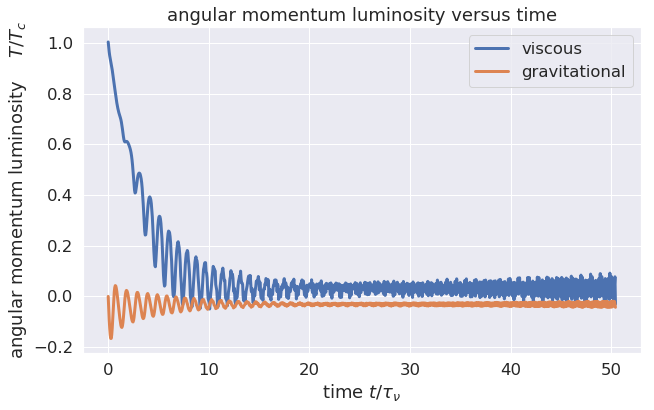

In [22]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=3, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=3, label='gravitational')
p = ax.set_title(r'angular momentum luminosity versus time')
p = ax.set_ylabel(r'angular momentum luminosity    $T/T_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

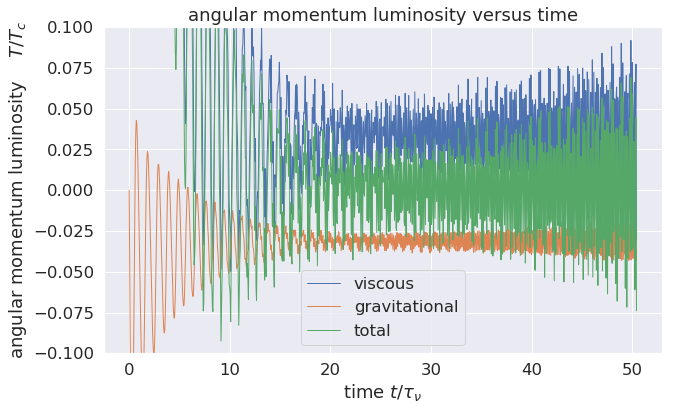

In [23]:
#plot angular momentum luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1, label='viscous')
y = grav_angular_momentum_luminosity/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1, label='gravitational')
y = (viscous_angular_momentum_luminosity + grav_angular_momentum_luminosity)/viscous_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1, label='total')
p = ax.set_title(r'angular momentum luminosity versus time')
p = ax.set_ylabel(r'angular momentum luminosity    $T/T_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylim(-0.1, 0.1)
p = ax.legend()

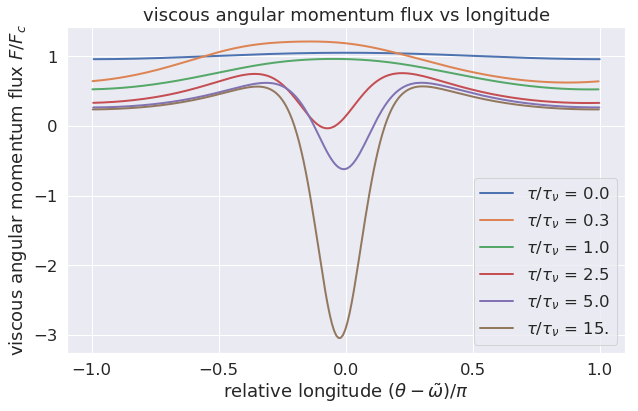

In [24]:
#plot viscous angular monentum flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    angular_momentum_flux_now = viscous_angular_momentum_flux[t_idx]
    r_now = rc[t_idx]
    t_now = tc[t_idx]
    wt_now = wtc[t_idx]
    pidx = r_now.argmin()
    wt_min = wt_now[pidx]
    t_rotating = adjust_angle(t_now - wt_min)
    y = angular_momentum_flux_now/viscous_flux_circular
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')

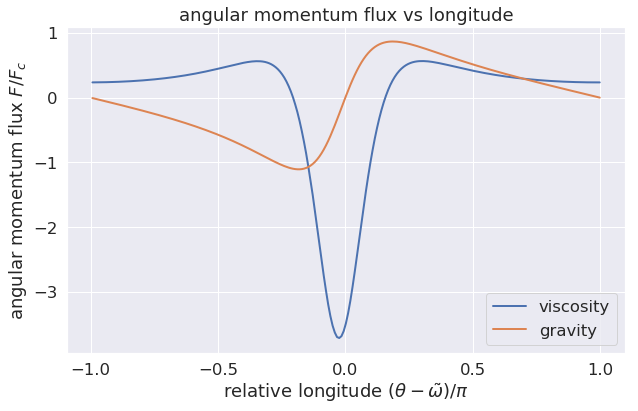

In [25]:
#plot final angular monentum fluxes vs longitude
f, ax = plt.subplots(figsize=(10, 6))
angular_momentum_flux_now = viscous_angular_momentum_flux[-1]
r_now = rc[-1]
t_now = tc[-1]
wt_now = wtc[-1]
pidx = r_now.argmin()
wt_min = wt_now[pidx]
t_rotating = adjust_angle(t_now - wt_min)
y = angular_momentum_flux_now/viscous_flux_circular
x = t_rotating/np.pi
idx = np.argsort(t_rotating)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscosity')
angular_momentum_flux_now = grav_angular_momentum_flux[-1]
y = angular_momentum_flux_now/viscous_flux_circular
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravity')
p = ax.set_title(r'angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'angular momentum flux $F/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')

In [26]:
#compute viscous energy flux and luminosity
G = -1.0
c = -1.0
nu_s = shear_viscosity
nu_b = bulk_viscosity
viscous_energy_flux, viscous_energy_luminosity, rc, tc, wtc = calculate_energy_flux(
    lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)
viscous_energy_flux_circular = viscous_flux_circular*w0
viscous_energy_luminosity_circular = viscous_luminosity_circular*w0

In [27]:
#compute gravitational energy flux and luminosity
G = G_ring
c = -1.0
nu_s = -1.0
nu_b = -1.0
grav_energy_flux, grav_energy_luminosity, rc, tc, wtc = calculate_energy_flux(
    lambda0, G, nu_s, nu_b, c, r, t, vr, vt, wt, fast_gravity)

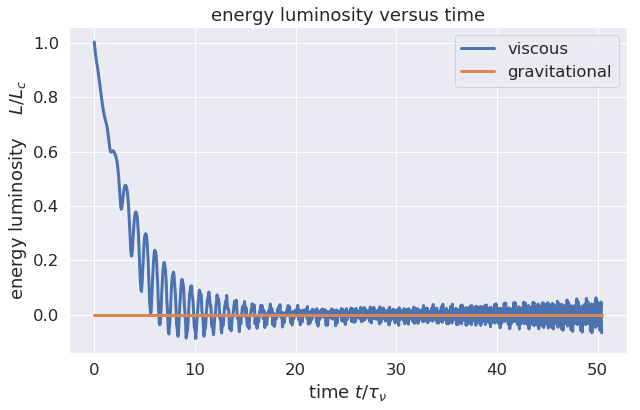

In [28]:
#plot energy luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = viscous_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=3, label='viscous')
y = grav_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=3, label='gravitational')
p = ax.set_title(r'energy luminosity versus time')
p = ax.set_ylabel(r'energy luminosity    $L/L_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend()

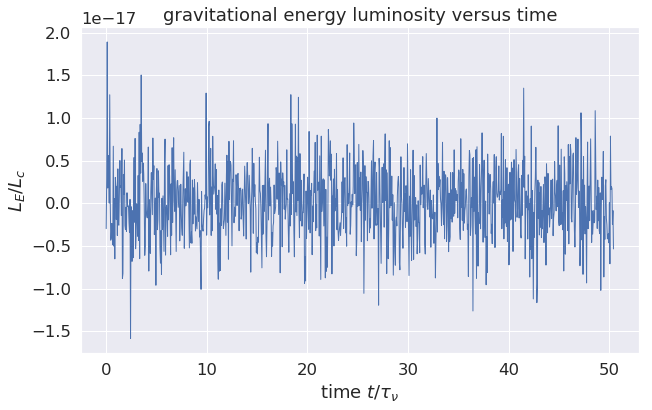

In [29]:
#plot grav_energy_luminosity versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = grav_energy_luminosity/viscous_energy_luminosity_circular
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'gravitational energy luminosity versus time')
p = ax.set_ylabel(r'$L_E/L_c$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

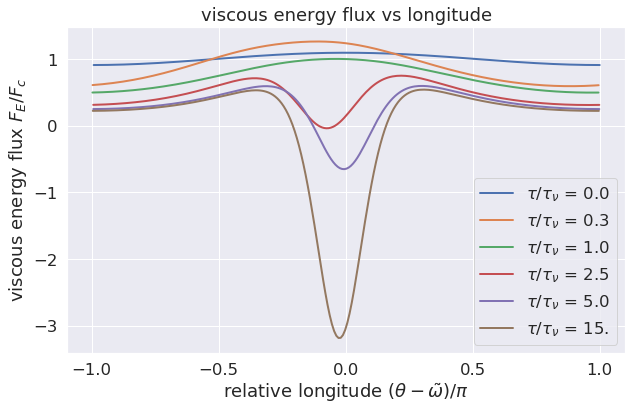

In [30]:
#plot viscous energy flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
#plot_times = [0.0, 1.0, 5.0, 15.0, 20.0, 25.0, 35.0, 100.0]
for plot_time in plot_times:
    t_idx = np.where(times_viscous >= plot_time)[0][0]
    viscous_energy_flux_now = viscous_energy_flux[t_idx]
    r_now = rc[t_idx]
    t_now = tc[t_idx]
    wt_now = wtc[t_idx]
    pidx = r_now.argmin()
    wt_min = wt_now[pidx]
    t_rotating = adjust_angle(t_now - wt_min)
    y = viscous_energy_flux_now/viscous_energy_flux_circular
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    lbl = r'$\tau/\tau_\nu$ = ' + str(times_viscous[t_idx])[0:3]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous energy flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous energy flux $F_E/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = ax.legend(loc='lower right')

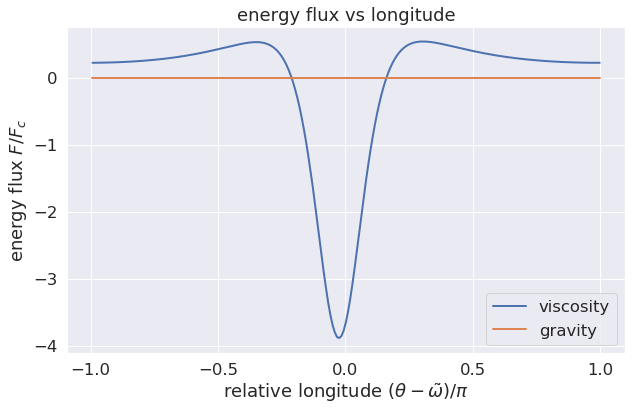

In [31]:
#plot final energy fluxes vs longitude
f, ax = plt.subplots(figsize=(10, 6))
energy_flux_now = viscous_energy_flux[-1]
r_now = rc[-1]
t_now = tc[-1]
wt_now = wtc[-1]
pidx = r_now.argmin()
wt_min = wt_now[pidx]
t_rotating = adjust_angle(t_now - wt_min)
y = energy_flux_now/viscous_energy_flux_circular
x = t_rotating/np.pi
idx = np.argsort(t_rotating)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='viscosity')
energy_flux_now = grav_energy_flux[-1]
y = energy_flux_now/viscous_energy_flux_circular
y = y[idx]
p = ax.plot(x, y, linestyle='-', linewidth=2, label='gravity')
p = ax.set_title(r'energy flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'energy flux $F/F_c$')
p = ax.xaxis.set_major_locator(plt.MaxNLocator(5))
p = plt.legend(loc='lower right')